In [38]:
import cv2
import os
import numpy as np
from PIL import Image

In [39]:
image_directory = "datasets/"

In [40]:
no_tumor_images = os.listdir(image_directory + "no/")
yes_tumor_images = os.listdir(image_directory + "yes/")

In [59]:
dataset = []
label = []

In [61]:
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + "no/" + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((28,28))
        dataset.append(np.array(image))
        label.append(0)
        
for i, image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + "yes/" + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((28,28))
        dataset.append(np.array(image))
        label.append(1)

In [62]:
print(len(dataset))
print(len(label))

2993
2993


In [63]:
dataset = np.array(dataset)
label = np.array(label)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.3, random_state= 0)

In [66]:
print(X_train[0].shape)

(28, 28, 3)


In [93]:
import tensorflow as  tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import layers, models
from keras.datasets import mnist
import keras
from matplotlib import pyplot as plt
from keras.utils import normalize
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [94]:
from keras.backend import exp

def newone4(x):
  return (1-tf.math.exp(-tf.math.exp(-x/2)))*tf.math.exp(-tf.math.exp(-x))+tf.math.exp(-tf.math.exp(-x/2))

In [95]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2095, 28, 28, 3)
(898, 28, 28, 3)
(2095,)
(898,)


In [97]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis = 1)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2095, 28, 28, 3)
(898, 28, 28, 3)
(2095,)
(898,)


In [101]:
model = models.Sequential()
# Use a CNN to process the image data before the LSTM
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Instead of Flatten, reshape the output of the CNN
model.add(layers.Reshape((13, 13 * 32)))  # Adjust the shape based on CNN output shape
model.add(layers.LSTM(128, activation='tanh', recurrent_activation=newone4, input_shape=(28,28,3)))
model.add(layers.Dense(10, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2095, 28, 28, 3)
(898, 28, 28, 3)
(2095,)
(898,)


In [103]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
66/66 [==============================] - 13s 92ms/step - loss: 0.6969 - accuracy: 0.6282 - val_loss: 0.5425 - val_accuracy: 0.7361
Epoch 2/30
66/66 [==============================] - 5s 69ms/step - loss: 0.5607 - accuracy: 0.7165 - val_loss: 0.5028 - val_accuracy: 0.7305
Epoch 3/30
66/66 [==============================] - 4s 67ms/step - loss: 0.5145 - accuracy: 0.7513 - val_loss: 0.5094 - val_accuracy: 0.7405
Epoch 4/30
66/66 [==============================] - 5s 68ms/step - loss: 0.4988 - accuracy: 0.7671 - val_loss: 0.4521 - val_accuracy: 0.7817
Epoch 5/30
66/66 [==============================] - 4s 67ms/step - loss: 0.4489 - accuracy: 0.8005 - val_loss: 0.4246 - val_accuracy: 0.8040
Epoch 6/30
66/66 [==============================] - 4s 66ms/step - loss: 0.4484 - accuracy: 0.7895 - val_loss: 0.4369 - val_accuracy: 0.8207
Epoch 7/30
66/66 [==============================] - 5s 69ms/step - loss: 0.4038 - accuracy: 0.8210 - val_loss: 0.4588 - val_accuracy: 0.8085
Epoch 8/30
6

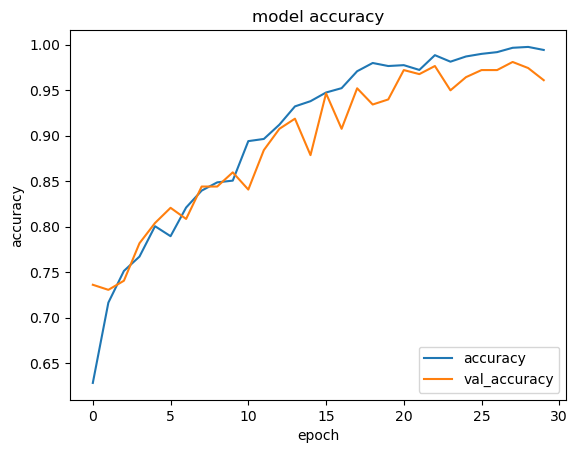

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()
#model.save('Minst_Lstm.model')

In [109]:
model = models.Sequential()
# Use a CNN to process the image data before the LSTM
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# Instead of Flatten, reshape the output of the CNN
model.add(layers.Reshape((13, 13 * 32)))  # Adjust the shape based on CNN output shape
model.add(layers.LSTM(128, activation='tanh', recurrent_activation=newone4, input_shape=(28,28)))
model.add(layers.Dense(10, activation='softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [110]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
66/66 [==============================] - 21s 103ms/step - loss: 0.7300 - accuracy: 0.5866 - val_loss: 0.6999 - val_accuracy: 0.5757
Epoch 2/30
66/66 [==============================] - 5s 82ms/step - loss: 0.5896 - accuracy: 0.6936 - val_loss: 0.5394 - val_accuracy: 0.7004
Epoch 3/30
66/66 [==============================] - 5s 76ms/step - loss: 0.5458 - accuracy: 0.7308 - val_loss: 0.5168 - val_accuracy: 0.7494
Epoch 4/30
66/66 [==============================] - 5s 72ms/step - loss: 0.5209 - accuracy: 0.7623 - val_loss: 0.5126 - val_accuracy: 0.7673
Epoch 5/30
66/66 [==============================] - 4s 67ms/step - loss: 0.5012 - accuracy: 0.7766 - val_loss: 0.4771 - val_accuracy: 0.7695
Epoch 6/30
66/66 [==============================] - 5s 70ms/step - loss: 0.4744 - accuracy: 0.7952 - val_loss: 0.5306 - val_accuracy: 0.7561
Epoch 7/30
66/66 [==============================] - 5s 71ms/step - loss: 0.4785 - accuracy: 0.7819 - val_loss: 0.4476 - val_accuracy: 0.7851
Epoch 8/30


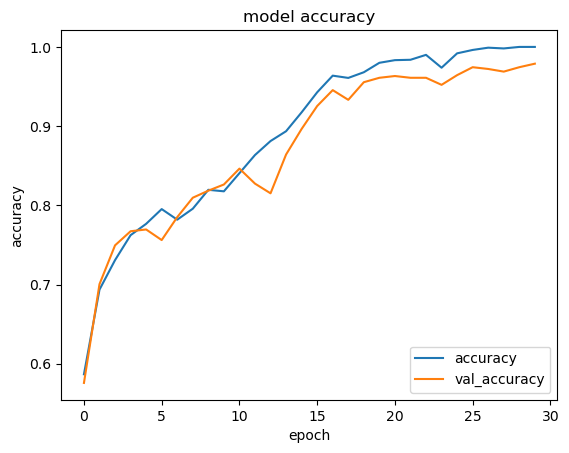

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()